In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# roberta-large results

In [2]:
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.50, 51.76, 59.55, 65.00]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

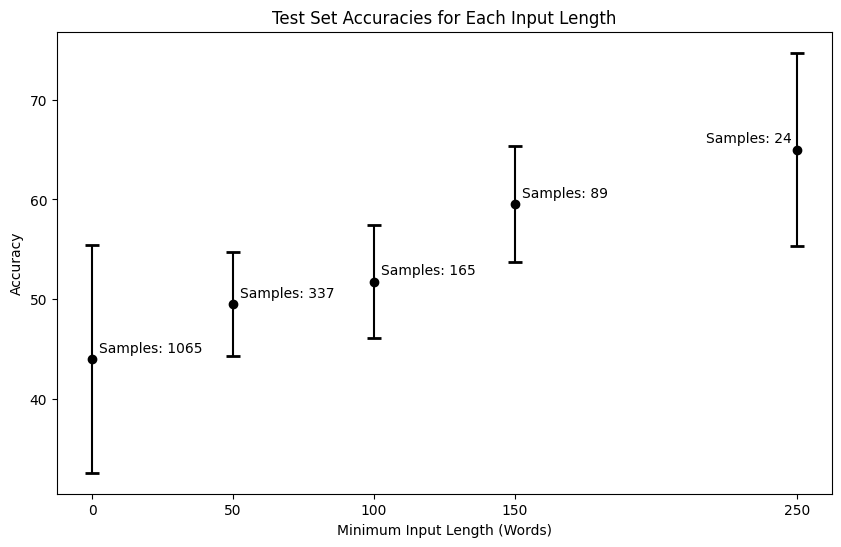

In [3]:
import matplotlib.pyplot as plt

# Data
input_lens = [0, 50, 100, 150, 250]
accuracies = [43.98, 49.5, 51.76, 59.55, 65.0]
stds = [11.41, 5.21, 5.69, 5.82, 9.72]
n_samples = [1065, 337, 165, 89, 24]

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(input_lens, accuracies, yerr=stds, fmt='o', capsize=5, capthick=2, ecolor='black', color='black', label='Accuracy')
for i, acc in enumerate(accuracies):
    if i == len(accuracies) - 1:  # If this is the last point
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(-65, 5), textcoords='offset points')
    else:
        plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(5, 5), textcoords='offset points')

# Axes labels
plt.xlabel('Minimum Input Length (Words)')
plt.ylabel('Accuracy')

plt.xticks(input_lens)

# Title
plt.title('Test Set Accuracies for Each Input Length')

# Save and show plot
plt.savefig('../TeX/figures/roberta-large_acc_for_min_len.png')
plt.show()

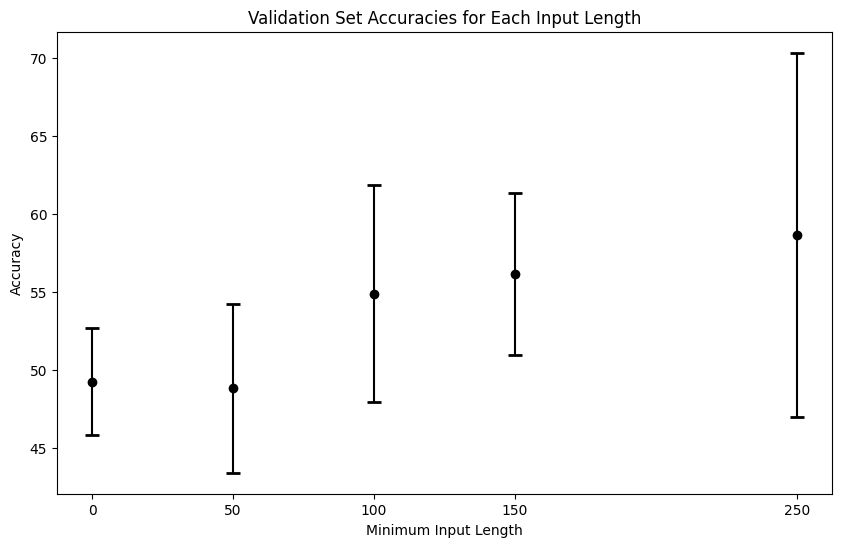

In [27]:
import matplotlib.pyplot as plt

# Data
input_lens = [0, 50, 100, 150, 250]
accuracies = [49.27, 48.84, 54.88, 56.15, 58.67]
stds = [3.4, 5.4, 6.94, 5.21, 11.64]
# n_samples = []

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(input_lens, accuracies, yerr=stds, fmt='o', capsize=5, capthick=2, ecolor='black', color='black', label='Accuracy')
# for i, acc in enumerate(accuracies):
#     if i == len(accuracies) - 1:  # If this is the last point
#         plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(-65, 5), textcoords='offset points')
#     else:
#         plt.annotate(f'Samples: {n_samples[i]}', (input_lens[i], acc), xytext=(5, 5), textcoords='offset points')

# Axes labels
plt.xlabel('Minimum Input Length')
plt.ylabel('Accuracy')

plt.xticks(input_lens)

# Title
plt.title('Validation Set Accuracies for Each Input Length')

# Save and show plot
# plt.savefig('../TeX/figures/roberta-large_val_acc_for_min_len.png')
plt.show()

# Descriptives

In [14]:
from utils.preprocessing.transcript import load_data_with_labels, combine_turns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
pacs_labels_path = r"E:\PACS\Data\PACS_labels_updated.xlsx"
all_docs_path = r"E:\PACS\Data\PACS_docx"

train_path = r"E:\PACS\Data\train_PACS.csv"
val_path = r"E:\PACS\Data\val_PACS.csv"
test_path = r"E:\PACS\Data\test_PACS.csv"

# Load data
full = load_data_with_labels(pacs_labels_path, all_docs_path)

train = pd.read_csv(train_path, sep="\t")
val = pd.read_csv(val_path, sep="\t")
test = pd.read_csv(test_path, sep="\t")

# Turn lengths
full["turn_length"] = full["text"].apply(lambda x: len(x.split()))
avg_turn_length = np.mean(full["turn_length"])

train["turn_length"] = train["text"].apply(lambda x: len(x.split()))
train_avg_turn_length = np.mean(train["turn_length"])

val["turn_length"] = val["text"].apply(lambda x: len(x.split()))
val_avg_turn_length = np.mean(val["turn_length"])

test["turn_length"] = test["text"].apply(lambda x: len(x.split()))
test_avg_turn_length = np.mean(test["turn_length"])


Loaded 78 documents.


In [15]:
train.shape[0], val.shape[0], test.shape[0]

(5343, 847, 1065)

In [16]:
train_val = pd.concat([train, val])
train_val_original_docs = train_val.drop_duplicates(subset=["document"]).drop(["text", "turn_length"], axis=1)

In [17]:
train_val_original_docs["label"].value_counts(normalize=True)

label
3    0.430769
2    0.307692
1    0.261538
Name: proportion, dtype: float64

In [18]:
train_val_combined = combine_turns(train_val, 150)

In [19]:
train_val_combined["label"].value_counts(normalize=True)

label
3    0.496894
2    0.308489
1    0.194617
Name: proportion, dtype: float64

In [20]:
full.rename(columns={"label": "Label"}, inplace=True)

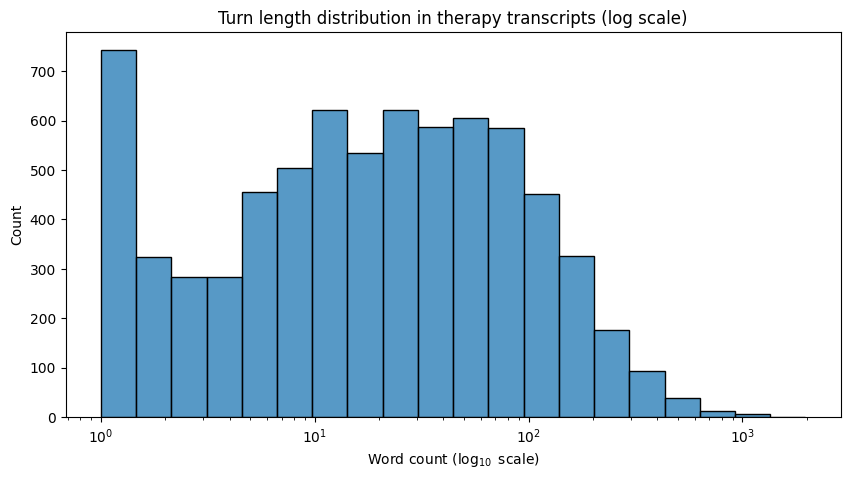

In [47]:
# Plot turn length distributions
plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(full["turn_length"], bins=20, label="Full PACS data set")
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_turn_length_dist_full.png")
plt.show()

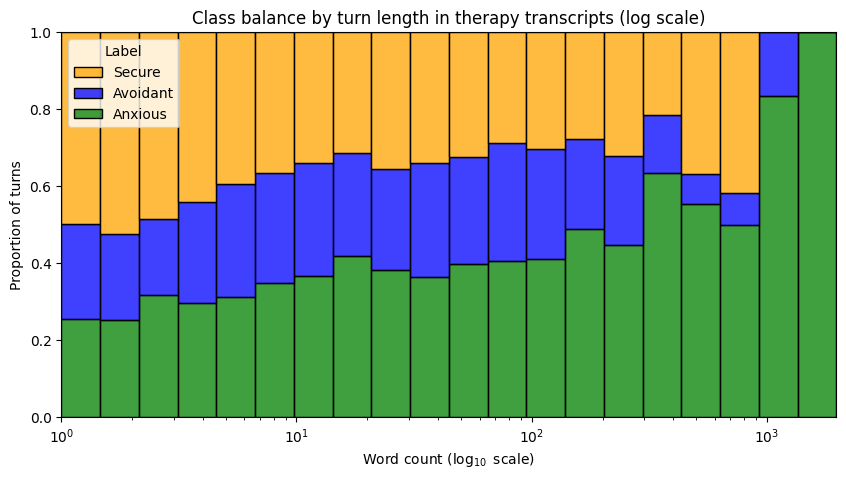

In [69]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="fill", legend=True)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.ylabel("Proportion of turns")
plt.title("Class balance by turn length in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/class_balance_by_log_turn_length.png")
plt.show()

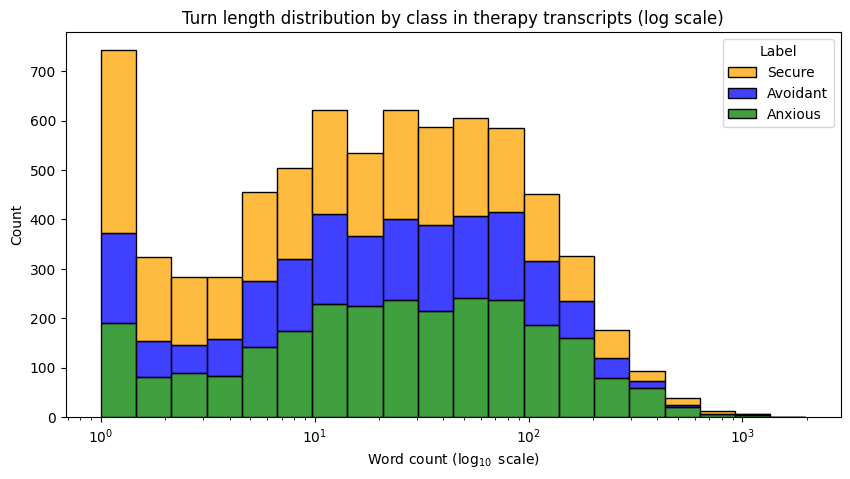

In [70]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Anxious"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)

# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Anxious": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="stack", legend=True)
plt.xlabel("Word count ($\log_{10}$ scale)")
plt.title("Turn length distribution by class in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/log_stack_turn_length_distribution_by_class.png")
# plt.savefig("/home/unicph.domain/wqs493/ucph/securegroupdir/SAMF-SODAS-PACS/Outputs/Descriptives/turn_length_distribution_by_class.png")
plt.show()

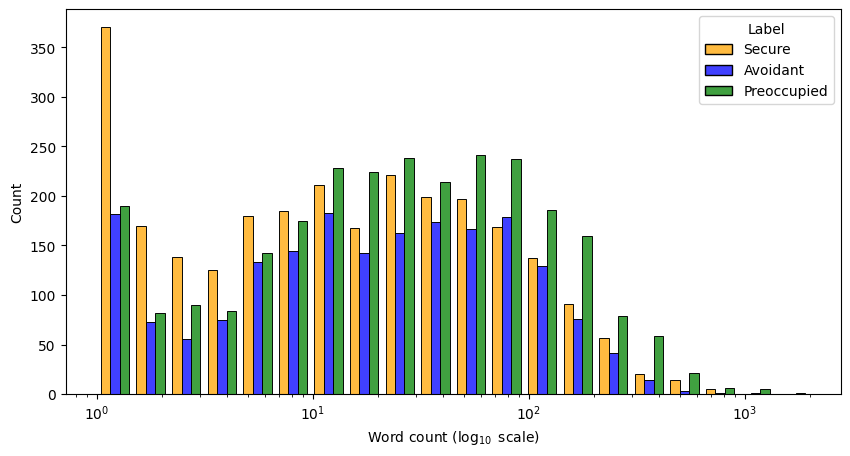

In [21]:
# Define the class names
class_names = {1: "Avoidant", 2: "Secure", 3: "Preoccupied"}

# Replace the numbers in the "label" column with the class names
full['Label'] = full['Label'].replace(class_names)


# Plot turn length distributions by class
# Define the color palette
palette = {"Avoidant": 'blue', "Secure": 'orange', "Preoccupied": 'green'}

plt.figure(figsize=(10, 5))
plt.xscale("log")
sns.histplot(data=full, x="turn_length", bins=20, hue="Label", palette=palette, multiple="dodge", legend=True, shrink=0.8)
plt.xlabel("Word count ($\log_{10}$ scale)")
# plt.title("Turn length distribution by class in therapy transcripts (log scale)")
plt.savefig("../TeX/figures/updates/log_dodge_turn_length_distribution_by_class.png")
plt.show()

# Error analysis

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
split1_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split1_test_preds.csv", sep="\t")
split2_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split2_test_preds.csv", sep="\t")
split3_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split3_test_preds.csv", sep="\t")
split4_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split4_test_preds.csv", sep="\t")
split5_preds = pd.read_csv(r"E:\PACS\robertal-large_150\split5_test_preds.csv", sep="\t")
targets = pd.read_csv(r"E:\PACS\robertal-large_150\test_combined_150.csv", sep="\t")

In [6]:
split1_preds.drop(columns=["document"], inplace=True)

split2_preds.drop(columns=["document", "text"], inplace=True)
split2_preds.rename(columns={"1": "2"}, inplace=True)

split3_preds.drop(columns=["document", "text"], inplace=True)
split3_preds.rename(columns={"1": "3"}, inplace=True)

split4_preds.drop(columns=["document", "text"], inplace=True)
split4_preds.rename(columns={"1": "4"}, inplace=True)

split5_preds.drop(columns=["document", "text"], inplace=True)
split5_preds.rename(columns={"1": "5"}, inplace=True)

all_preds = pd.concat([split1_preds, split2_preds, split3_preds, split4_preds, split5_preds], axis=1)

In [7]:
results = pd.concat([targets.drop(columns="text"), all_preds], axis=1)

In [8]:
results["vote"] = results.drop(columns=["label"]).mode(axis=1, numeric_only=True)[0]

In [9]:
cm_total = confusion_matrix(results["label"], results["vote"], labels=[1, 2, 3])
cm_total

array([[ 3,  0, 19],
       [ 0,  4,  8],
       [ 2,  0, 53]], dtype=int64)

In [10]:
cm_1 = confusion_matrix(results["label"], results["1"], labels=[1, 2, 3])
cm_2 = confusion_matrix(results["label"], results["2"], labels=[1, 2, 3])
cm_3 = confusion_matrix(results["label"], results["3"], labels=[1, 2, 3])
cm_4 = confusion_matrix(results["label"], results["4"], labels=[1, 2, 3])
cm_5 = confusion_matrix(results["label"], results["5"], labels=[1, 2, 3])

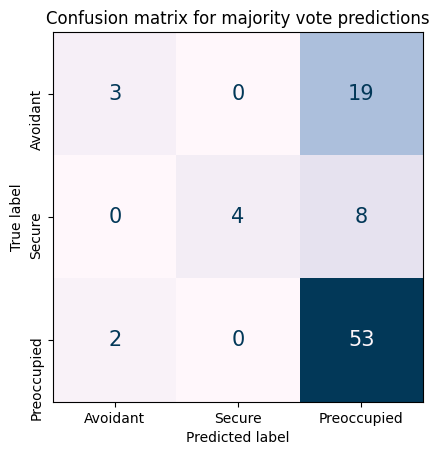

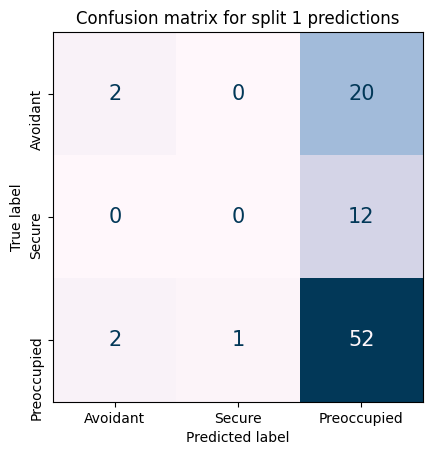

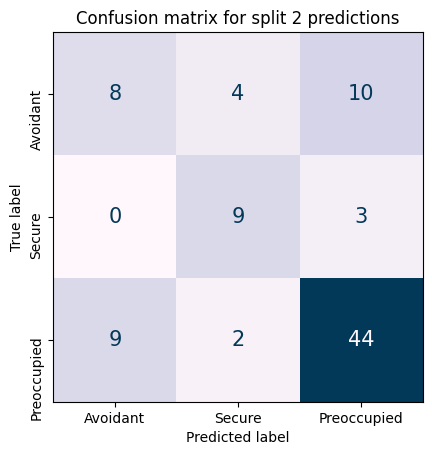

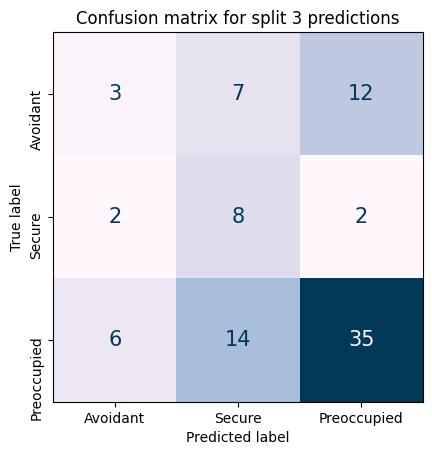

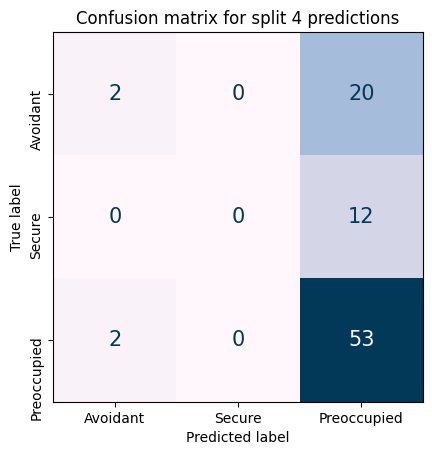

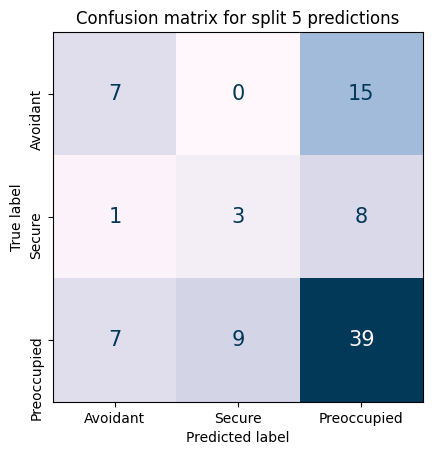

In [11]:
cmap = "PuBu"
# cmap = "binary"
# cmap = "bone_r"
# cmap = "magma_r"
# cmap = "Blues"

ConfusionMatrixDisplay(cm_total, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for majority vote predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_combined_confusion_matrix.png")

ConfusionMatrixDisplay(cm_1, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 1 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split1_confusion_matrix.png")

ConfusionMatrixDisplay(cm_2, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 2 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split2_confusion_matrix.png")

ConfusionMatrixDisplay(cm_3, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 3 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split3_confusion_matrix.png")

ConfusionMatrixDisplay(cm_4, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 4 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split4_confusion_matrix.png")

ConfusionMatrixDisplay(cm_5, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, text_kw={"size": 15}, colorbar=False)
plt.title("Confusion matrix for split 5 predictions", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(rotation=90)
plt.savefig("../TeX/figures/updates/roberta-large_150_split5_confusion_matrix.png")

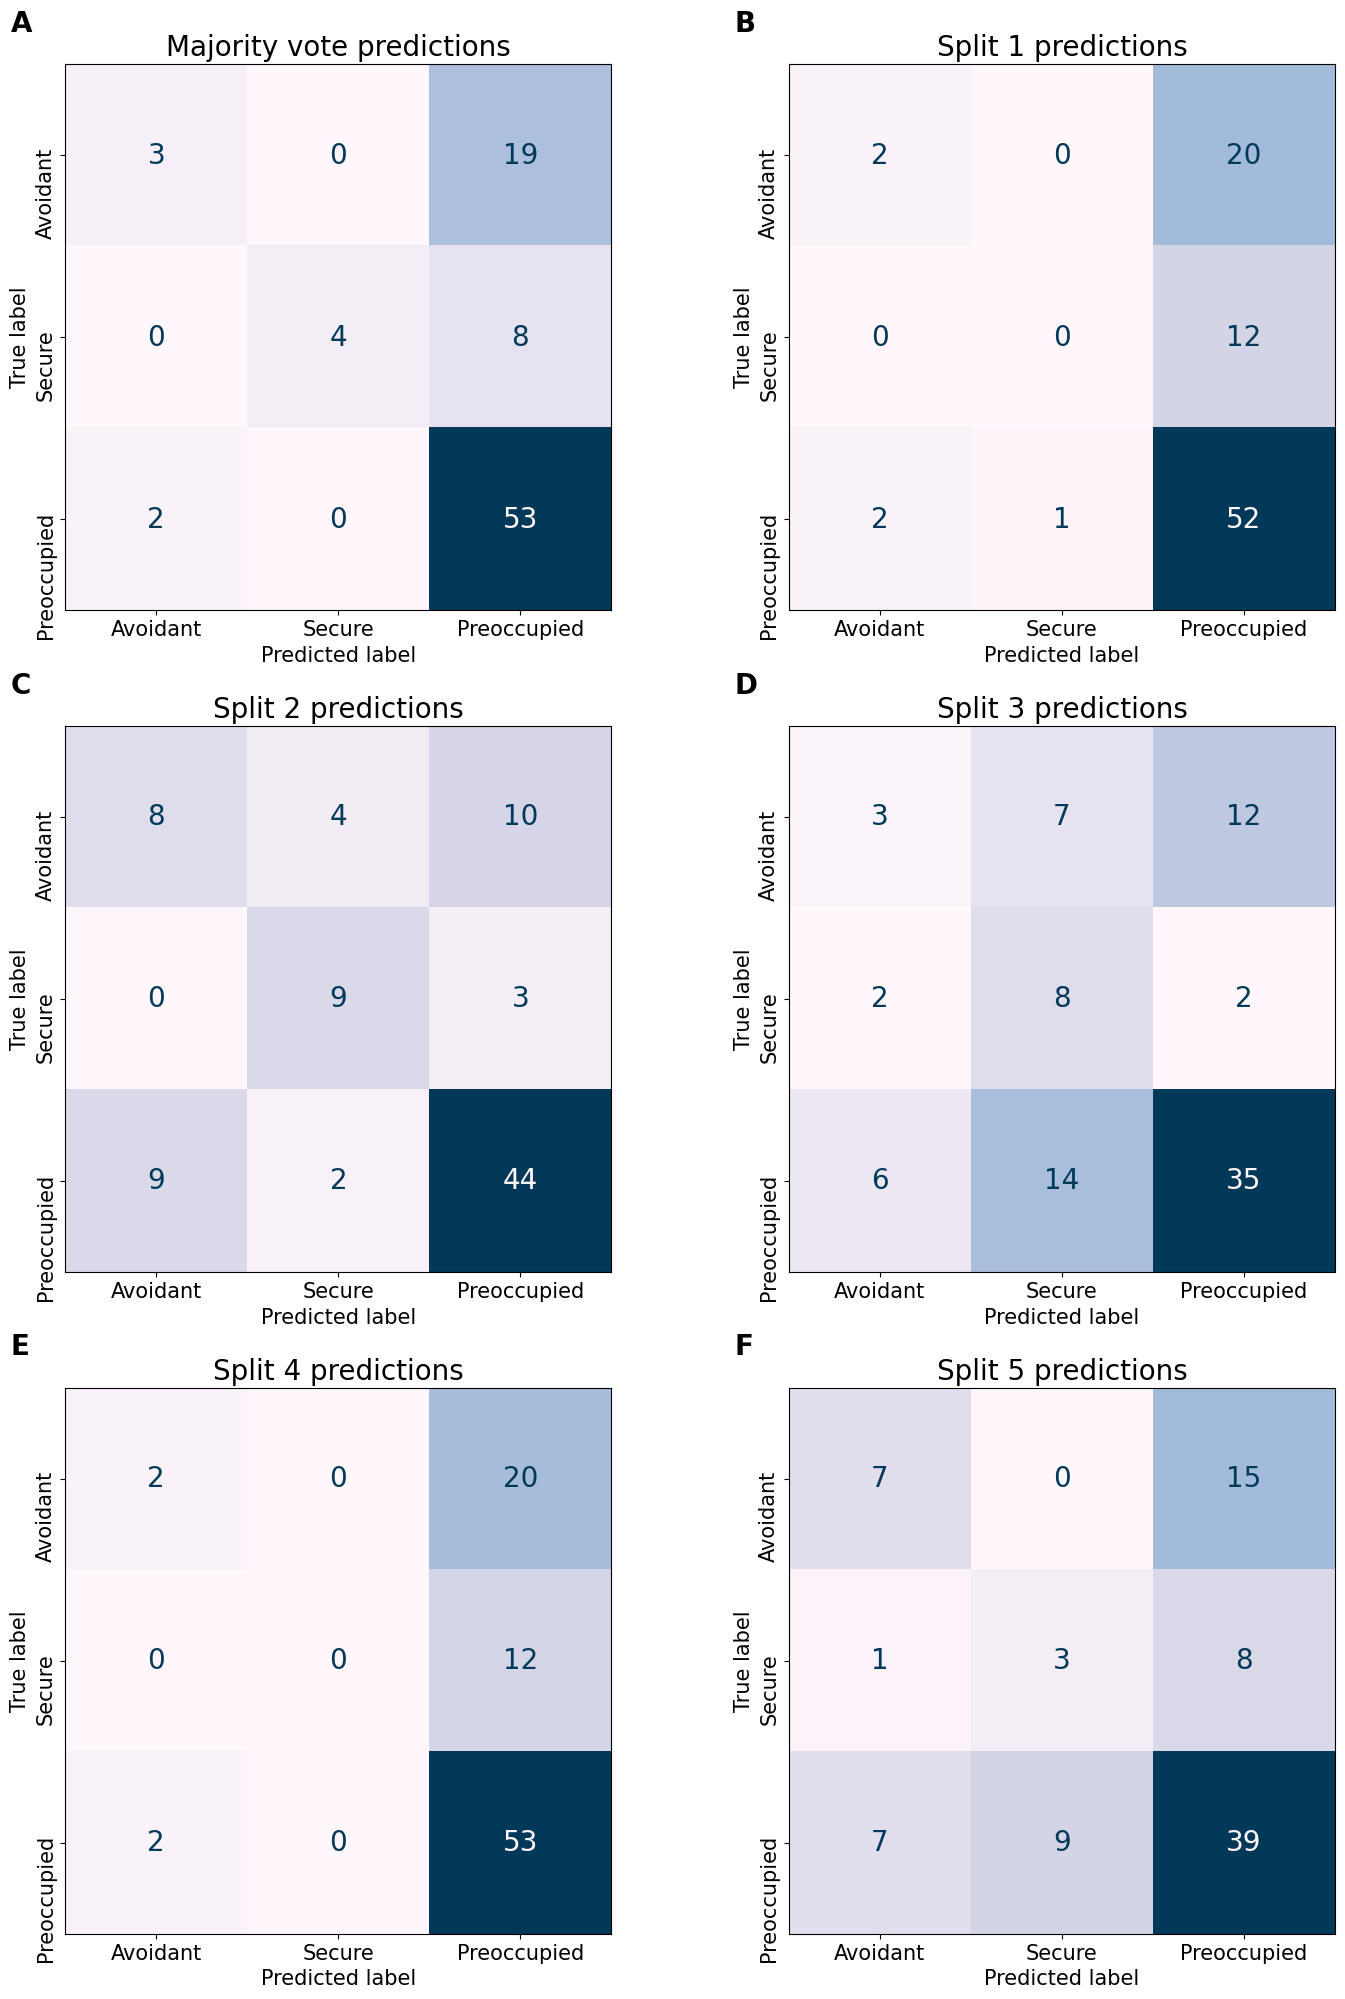

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))  # create a 3x2 grid of subplots
title_size = 20
text_size = 20
tick_size = 15
label_size = 15

# Plot the confusion matrices
ConfusionMatrixDisplay(cm_total, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[0, 0], text_kw={"size": text_size}, colorbar=False)
axs[0, 0].set_title("Majority vote predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_1, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[0, 1], text_kw={"size": text_size}, colorbar=False)
axs[0, 1].set_title("Split 1 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_2, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[1, 0], text_kw={"size": text_size}, colorbar=False)
axs[1, 0].set_title("Split 2 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_3, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[1, 1], text_kw={"size": text_size}, colorbar=False)
axs[1, 1].set_title("Split 3 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_4, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[2, 0], text_kw={"size": text_size}, colorbar=False)
axs[2, 0].set_title("Split 4 predictions", fontsize=title_size)

ConfusionMatrixDisplay(cm_5, display_labels=["Avoidant", "Secure", "Preoccupied"]).plot(cmap=cmap, ax=axs[2, 1], text_kw={"size": text_size}, colorbar=False)
axs[2, 1].set_title("Split 5 predictions", fontsize=title_size)

# Rotate the y-axis labels
for ax in axs.flat:
    labels = ax.get_yticklabels()
    ax.set_yticklabels(labels, rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=label_size)  # Change tick label font size
    ax.xaxis.label.set_size(tick_size)  # Change x-axis label font size
    ax.yaxis.label.set_size(tick_size)  # Change y-axis label font size
    
# Label the subplots
labels = ['A', 'B', 'C', 'D', 'E', 'F']
for ax, label in zip(axs.flat, labels):
    ax.text(-0.1, 1.1, label, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top')

# Adjust the layout
plt.tight_layout()
# fig.colorbar(axs[0, 0].get_images()[0], ax=axs, orientation='vertical', fraction=.1, pad=0.05, aspect=80)

# # Save the figure
plt.savefig("../TeX/figures/updates/combined_confusion_matrix.png")
# plt.show()

In [14]:
total_precision = np.diag(cm_total) / np.sum(cm_total, axis=0)
total_recall = np.diag(cm_total) / np.sum(cm_total, axis=1)
total_f1 = 2 * total_precision * total_recall / (total_precision + total_recall)

print(f"Total precision: {total_precision}")
print(f"Total recall: {total_recall}")
print(f"Total F1: {total_f1}")

Total precision: [0.6    1.     0.6625]
Total recall: [0.13636364 0.33333333 0.96363636]
Total F1: [0.22222222 0.5        0.78518519]


In [42]:
acc = accuracy_score(results["label"], results["vote"])
prec = precision_score(results["label"], results["vote"], average="macro")
rec = recall_score(results["label"], results["vote"], average="macro")
f1_micro = f1_score(results["label"], results["vote"], average="micro")
f1_macro = f1_score(results["label"], results["vote"], average="macro")
f1_weighted = f1_score(results["label"], results["vote"], average="weighted")

In [43]:
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 micro: {f1_micro}")
print(f"F1 macro: {f1_macro}")
print(f"F1 weighted: {f1_weighted}")

Accuracy: 0.6741573033707865
Precision: 0.7541666666666668
Recall: 0.4777777777777778
F1 micro: 0.6741573033707865
F1 macro: 0.5024691358024692
F1 weighted: 0.6075738660008323


In [59]:
# Split 1
# precision_1 = np.diag(cm_1) / np.sum(cm_1, axis=0)
micro_precision_1 = precision_score(results["label"], results["1"], average="micro")
macro_precision_1 = precision_score(results["label"], results["1"], average="macro")

# recall_1 = np.diag(cm_1) / np.sum(cm_1, axis=1)
micro_recall_1 = recall_score(results["label"], results["1"], average="micro")
macro_recall_1 = recall_score(results["label"], results["1"], average="macro")

# f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)
micro_f1_1 = f1_score(results["label"], results["1"], average="micro")
macro_f1_1 = f1_score(results["label"], results["1"], average="macro")

# print(f"Precision 1: {precision_1}")
print(f"Micro precision 1: {round(micro_precision_1*100, 2)}")
print(f"Macro precision 1: {round(macro_precision_1*100, 2)}")
print("\n")

# print(f"Recall 1: {recall_1}")
print(f"Micro recall 1: {round(micro_recall_1*100, 2)}")
print(f"Macro recall 1: {round(macro_recall_1*100, 2)}")
print("\n")

# print(f"F1 1: {f1_1}")
print(f"Micro F1 1: {round(micro_f1_1*100, 2)}")
print(f"Macro F1 1: {round(macro_f1_1*100, 2)}")

Micro precision 1: 60.67
Macro precision 1: 37.3


Micro recall 1: 60.67
Macro recall 1: 34.55


Micro F1 1: 60.67
Macro F1 1: 30.07


In [60]:
# Split 2
micro_precision_2 = precision_score(results["label"], results["2"], average="micro")
macro_precision_2 = precision_score(results["label"], results["2"], average="macro")

micro_recall_2 = recall_score(results["label"], results["2"], average="micro")
macro_recall_2 = recall_score(results["label"], results["2"], average="macro")

micro_f1_2 = f1_score(results["label"], results["2"], average="micro")
macro_f1_2 = f1_score(results["label"], results["2"], average="macro")

print(f"Micro precision 2: {round(micro_precision_2*100, 2)}")
print(f"Macro precision 2: {round(macro_precision_2*100, 2)}")
print("\n")

print(f"Micro recall 2: {round(micro_recall_2*100, 2)}")
print(f"Macro recall 2: {round(macro_recall_2*100, 2)}")
print("\n")

print(f"Micro F1 2: {round(micro_f1_2*100, 2)}")
print(f"Macro F1 2: {round(macro_f1_2*100, 2)}")

Micro precision 2: 68.54
Macro precision 2: 61.42


Micro recall 2: 68.54
Macro recall 2: 63.79


Micro F1 2: 68.54
Macro F1 2: 62.09


In [61]:
# Split 3
micro_precision_3 = precision_score(results["label"], results["3"], average="micro")
macro_precision_3 = precision_score(results["label"], results["3"], average="macro")

micro_recall_3 = recall_score(results["label"], results["3"], average="micro")
macro_recall_3 = recall_score(results["label"], results["3"], average="macro")

micro_f1_3 = f1_score(results["label"], results["3"], average="micro")
macro_f1_3 = f1_score(results["label"], results["3"], average="macro")

print(f"Micro precision 3: {round(micro_precision_3*100, 2)}")
print(f"Macro precision 3: {round(macro_precision_3*100, 2)}")
print("\n")

print(f"Micro recall 3: {round(micro_recall_3*100, 2)}")
print(f"Macro recall 3: {round(macro_recall_3*100, 2)}")
print("\n")

print(f"Micro F1 3: {round(micro_f1_3*100, 2)}")
print(f"Macro F1 3: {round(macro_f1_3*100, 2)}")

Micro precision 3: 51.69
Macro precision 3: 42.1


Micro recall 3: 51.69
Macro recall 3: 47.98


Micro F1 3: 51.69
Macro F1 3: 41.5


In [62]:
# Split 4
micro_precision_4 = precision_score(results["label"], results["4"], average="micro")
macro_precision_4 = precision_score(results["label"], results["4"], average="macro")

micro_recall_4 = recall_score(results["label"], results["4"], average="micro")
macro_recall_4 = recall_score(results["label"], results["4"], average="macro")

micro_f1_4 = f1_score(results["label"], results["4"], average="micro")
macro_f1_4 = f1_score(results["label"], results["4"], average="macro")

print(f"Micro precision 4: {round(micro_precision_4*100, 2)}")
print(f"Macro precision 4: {round(macro_precision_4*100, 2)}")
print("\n")

print(f"Micro recall 4: {round(micro_recall_4*100, 2)}")
print(f"Macro recall 4: {round(macro_recall_4*100, 2)}")
print("\n")

print(f"Micro F1 4: {round(micro_f1_4*100, 2)}")
print(f"Macro F1 4: {round(macro_f1_4*100, 2)}")


Micro precision 4: 61.8
Macro precision 4: 37.45


Micro recall 4: 61.8
Macro recall 4: 35.15


Micro F1 4: 61.8
Macro F1 4: 30.37


c:\Users\frbre\OneDrive\01 Dokumenter\01 Uni\SDS Thesis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Split 5
micro_precision_5 = precision_score(results["label"], results["5"], average="micro")
macro_precision_5 = precision_score(results["label"], results["5"], average="macro")

micro_recall_5 = recall_score(results["label"], results["5"], average="micro")
macro_recall_5 = recall_score(results["label"], results["5"], average="macro")

micro_f1_5 = f1_score(results["label"], results["5"], average="micro")
macro_f1_5 = f1_score(results["label"], results["5"], average="macro")

print(f"Micro precision 5: {round(micro_precision_5*100, 2)}")
print(f"Macro precision 5: {round(macro_precision_5*100, 2)}")
print("\n")

print(f"Micro recall 5: {round(micro_recall_5*100, 2)}")
print(f"Macro recall 5: {round(macro_recall_5*100, 2)}")
print("\n")

print(f"Micro F1 5: {round(micro_f1_5*100, 2)}")
print(f"Macro F1 5: {round(macro_f1_5*100, 2)}")

Micro precision 5: 55.06
Macro precision 5: 44.86


Micro recall 5: 55.06
Macro recall 5: 42.58


Micro F1 5: 55.06
Macro F1 5: 43.17


# Validation results table

In [122]:
import statistics

accs = [35.82, 59.68, 52.52, 48.61, 49.15]

mean_accs = statistics.mean(accs)
std_dev_accs = statistics.stdev(accs)

print(f"Mean: {round(mean_accs, 2)}")
print(f"Standard Deviation: {round(std_dev_accs, 2)}")

Mean: 49.16
Standard Deviation: 8.66


In [49]:
val_results = pd.read_excel("../notebooks/val_results.xlsx")

In [51]:
val_results.ffill(inplace=True)

In [53]:
val_results.rename(columns={"avg_val_acc": "Average validation set accuracy", "val_std": "Standard deviation"}, inplace=True)

In [140]:
# val_results.set_index(['Encoder', val_results.index], inplace=True)

In [141]:
val_results.to_latex("../TeX/figures/val_results.tex", index=False)

In [54]:
def format_mean_std(row):
    return f"{row['Average validation set accuracy']} ({row['Standard deviation']})"

val_results['Average validation set accuracy'] = val_results.apply(format_mean_std, axis=1)

In [56]:
val_results.drop(columns="Standard deviation", inplace=True)

In [58]:
val_results.rename(columns={"Average validation set accuracy": "Average validation set accuracy (SD)"}, inplace=True)

In [60]:
val_results.to_latex("../TeX/figures/val_results_APA.tex", index=False)

# Orthogonal scales visualisation

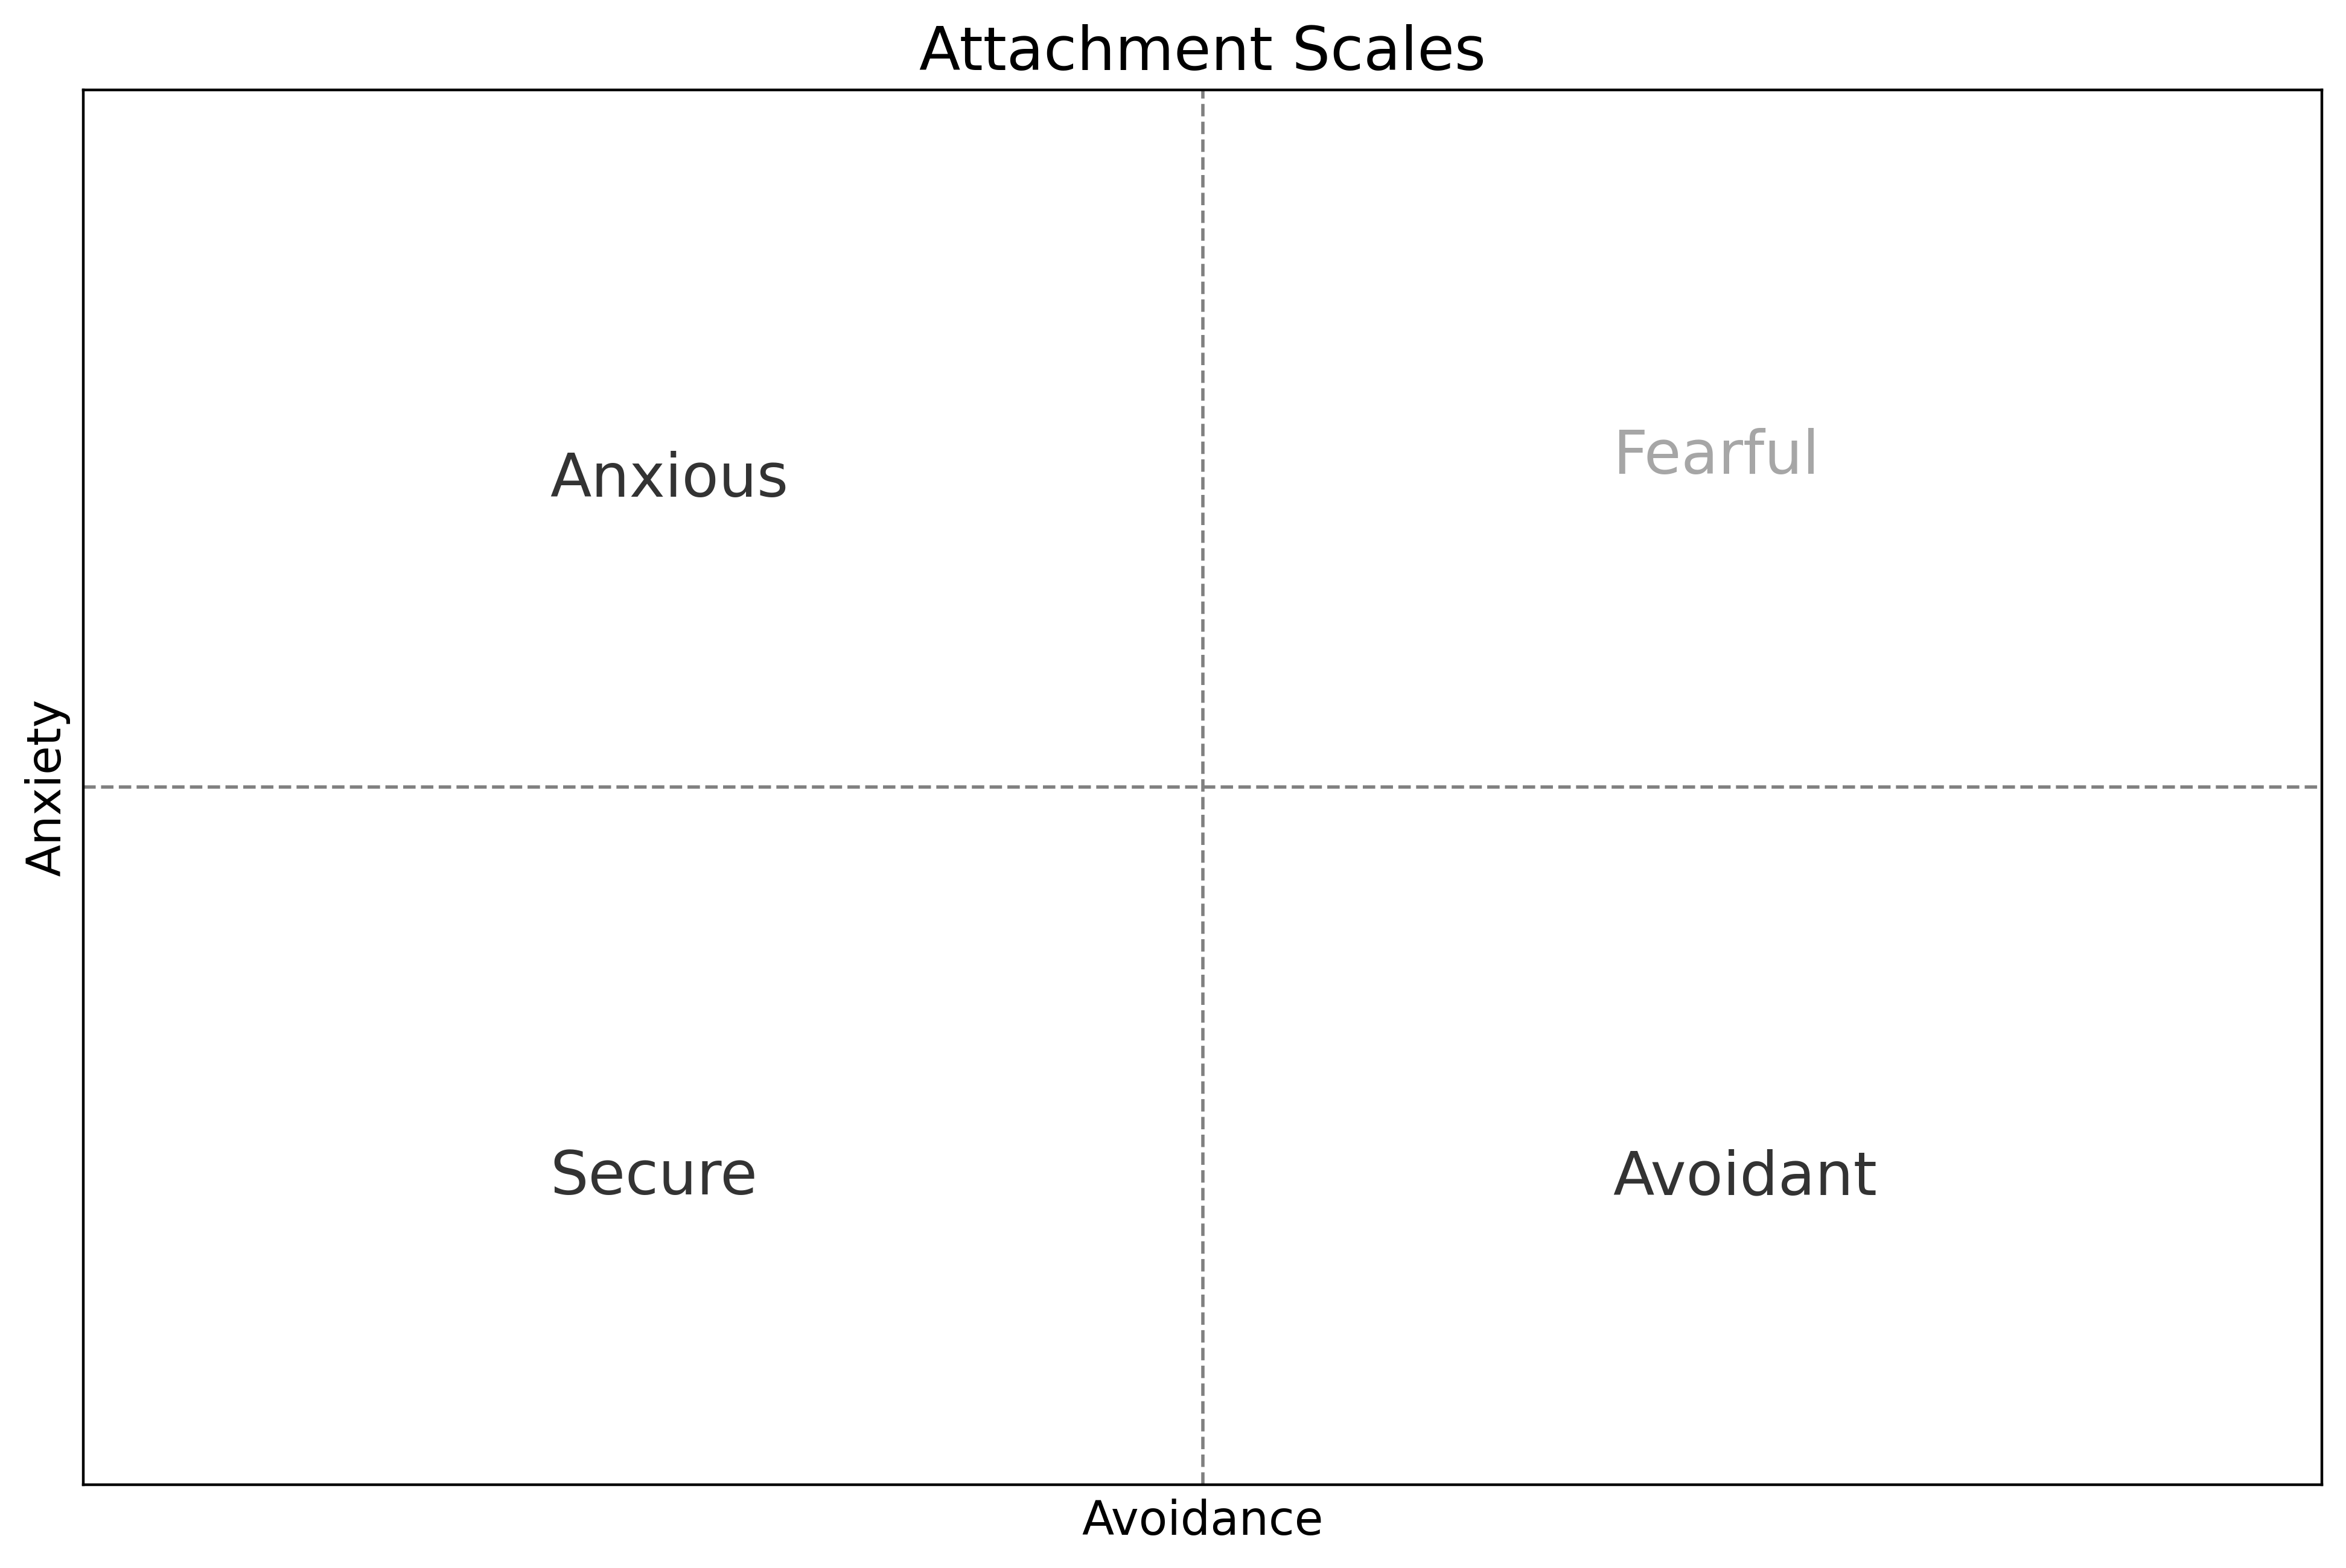

In [167]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=400)
fig.tight_layout()
fig.subplots_adjust(top=0.88)  # adjust the top padding
# fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# labels
plt.title("Attachment Scales", fontsize=18)
plt.xlabel("Avoidance", fontsize=14)
plt.ylabel("Anxiety", fontsize=14)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

# lines
ax.axhline(3, color="gray", linewidth=1, ls="--") # add horizontal line
ax.axvline(3, color="gray", linewidth=1, ls="--") # add vertical line

# text
plt.text(1.25, 1.25, "Secure", fontsize=18, color="black", alpha=0.8)
plt.text(4.1, 1.25, "Avoidant", fontsize=18, color="black", alpha=0.8)
plt.text(1.25, 4.25, "Anxious", fontsize=18, color="black", alpha=0.8)
plt.text(4.1, 4.35, "Fearful", fontsize=18, color="black", alpha=0.35)

# Set axis limits
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

fig.set_facecolor("white") # set background colour to white to make labels and title visible in dark mode

plt.savefig("../TeX/figures/attachment_scales.png")
plt.show()

# Class balance check

In [28]:
import pandas as pd
from utils.preprocessing.transcript import load_data_with_labels, combine_turns

In [31]:
train_path = r"D:\PACS\train_PACS.csv"
train_data = pd.read_csv(train_path, sep="\t")

In [32]:
combined_train = combine_turns(train_data, 150)

In [35]:
combined_train['label'].value_counts(normalize=True)

label
3    0.476744
2    0.316279
1    0.206977
Name: proportion, dtype: float64

In [36]:
test_path = r"D:\PACS\test_PACS.csv"
test_data = pd.read_csv(test_path, sep="\t")

In [37]:
combined_test = combine_turns(test_data, 150)

In [38]:
combined_test['label'].value_counts(normalize=True)

label
3    0.617978
1    0.247191
2    0.134831
Name: proportion, dtype: float64

# Cohens kappa

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
split1_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split1_test_preds.csv", sep="\t")
split2_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split2_test_preds.csv", sep="\t")
split3_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split3_test_preds.csv", sep="\t")
split4_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split4_test_preds.csv", sep="\t")
split5_preds = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\split5_test_preds.csv", sep="\t")
targets = pd.read_csv(r"C:\Users\frbre\Desktop\PACS_preds\test_combined_150.csv", sep="\t")

split1_preds.drop(columns=["document"], inplace=True)

split2_preds.drop(columns=["document", "text"], inplace=True)
split2_preds.rename(columns={"1": "2"}, inplace=True)

split3_preds.drop(columns=["document", "text"], inplace=True)
split3_preds.rename(columns={"1": "3"}, inplace=True)

split4_preds.drop(columns=["document", "text"], inplace=True)
split4_preds.rename(columns={"1": "4"}, inplace=True)

split5_preds.drop(columns=["document", "text"], inplace=True)
split5_preds.rename(columns={"1": "5"}, inplace=True)

all_preds = pd.concat([split1_preds, split2_preds, split3_preds, split4_preds, split5_preds], axis=1)

results = pd.concat([targets.drop(columns="text"), all_preds], axis=1)

results["vote"] = results.drop(columns=["label"]).mode(axis=1, numeric_only=True)[0]

In [7]:
results.isna().sum()

label       0
document    0
text        0
1           0
2           0
3           0
4           0
5           0
vote        0
dtype: int64

In [8]:
cm_total = confusion_matrix(results["label"], results["vote"], labels=[1, 2, 3])
cm_total

array([[ 3,  0, 19],
       [ 0,  4,  8],
       [ 2,  0, 53]], dtype=int64)

In [9]:
cm_1 = confusion_matrix(results["label"], results["1"], labels=[1, 2, 3])
cm_2 = confusion_matrix(results["label"], results["2"], labels=[1, 2, 3])
cm_3 = confusion_matrix(results["label"], results["3"], labels=[1, 2, 3])
cm_4 = confusion_matrix(results["label"], results["4"], labels=[1, 2, 3])
cm_5 = confusion_matrix(results["label"], results["5"], labels=[1, 2, 3])

In [12]:
k1 = cohen_kappa_score(results["label"], results["1"]).round(2)
k2 = cohen_kappa_score(results["label"], results["2"]).round(2)
k3 = cohen_kappa_score(results["label"], results["3"]).round(2)
k4 = cohen_kappa_score(results["label"], results["4"]).round(2)
k5 = cohen_kappa_score(results["label"], results["5"]).round(2)
k_total = cohen_kappa_score(results["label"], results["vote"]).round(2)

print(f"Kappa 1: {k1}")
print(f"Kappa 2: {k2}")
print(f"Kappa 3: {k3}")
print(f"Kappa 4: {k4}")
print(f"Kappa 5: {k5}")
print(f"Kappa total: {k_total}")

Kappa 1: 0.03
Kappa 2: 0.41
Kappa 3: 0.17
Kappa 4: 0.04
Kappa 5: 0.12
Kappa total: 0.23


In [13]:
np.mean([k1, k2, k3, k4, k5])

0.154